# Wine Quality Dataset

### Origem do Dataset

- [*Kaggle - Wine Quality*](https://www.kaggle.com/datasets/rajyellow46/wine-quality/data)
- [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality)

#### Dataset Preparado

Após a última etapa, foram geradas versões preparadas do dataset supracitado, visando otimizar o treinamento de potenciais modelos. Os datasets preparados podem ser encontrados em [Repositório do *GitHub*](https://github.com/guilherme-puida/ia/tree/main/datasets/wine_quality/prepared).

### Atribuições

O dataset utilizado foi disponibilizado em página da [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality) sob a licença *CC BY 4.0*. As atribuições de autores se encontram no mesmo *site* supracitado. O dataset possui *paper* introdutório sob autoria de [CORTEZ et al (2009)](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

CORTEZ, Paulo; ANTÓNIO CERDEIRA; ALMEIDA, Fernando; et al. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, v. 47, n. 4, p. 547–553, 2009. Disponível em: <https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub>.

### Objetivo

Esse notebook visa selecionar os modelos de maior potencial para o presente dataset.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


all_wines = pd.read_csv('/content/prepared_wine_quality_all_wines.csv')
red_wines = pd.read_csv('/content/prepared_wine_quality_red_wines.csv')
white_wines = pd.read_csv('/content/prepared_wine_quality_white_wines.csv')

In [51]:
# reposicionando a coluna "type"

cols = ["fixed acidity", "volatile acidity",	"citric acid",	"residual sugar", "chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density", "pH", "sulphates",	"alcohol", "type", "quality"]
all_wines = all_wines.reindex(columns=cols)

display(all_wines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Red,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,White,6
6423,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,White,5
6424,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,White,6
6425,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,White,7


Em um primeiro momento, consideraremos os valores da coluna "type" enquanto valores numéricos, sendo "Red" igual a 0 e "White" igual a 1.

Além disso, apenas para fins de comparação, os valores referentes à qualidade no dataset original serão convertidos para o tipo *float*.

In [52]:
# Convertendo os valores da coluna "type" para a forma numérica

new_all_wines = all_wines # as alterações não serão realizadas no dataset original
new_all_wines['type'] = new_all_wines['type'].apply(lambda t: 0 if t == "Red" else 1)

# Convertendo os valores da coluna "quality" para o tipo *float*
new_all_wines['quality'] = new_all_wines['quality'].astype(float)

In [53]:
# separando as variáveis independentes

X = new_all_wines.iloc[:, :-1].values
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  0.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  0.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  0.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  1.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  1.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  1.  ]])

In [54]:
# separando a variável dependente

y = new_all_wines['quality'].values
y

array([5., 5., 5., ..., 6., 7., 6.])

In [55]:
# separando as variáveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelo: lr
Erro Quadrático Médio -> lr: 0.552385144543777
Erro Absoluto Médio -> lr: 0.5789328470094429



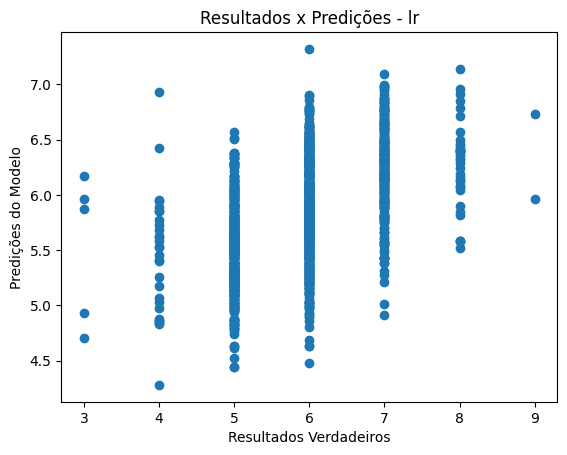




Modelo: knn
Erro Quadrático Médio -> knn: 0.6288024883359253
Erro Absoluto Médio -> knn: 0.6139968895800935



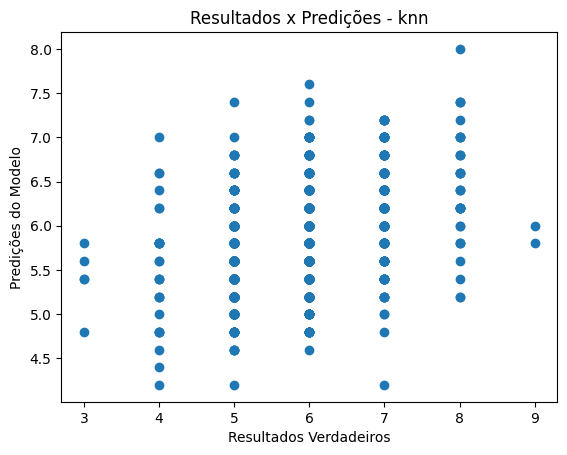




Modelo: rf
Erro Quadrático Médio -> rf: 0.3554848367029549
Erro Absoluto Médio -> rf: 0.4192612752721617



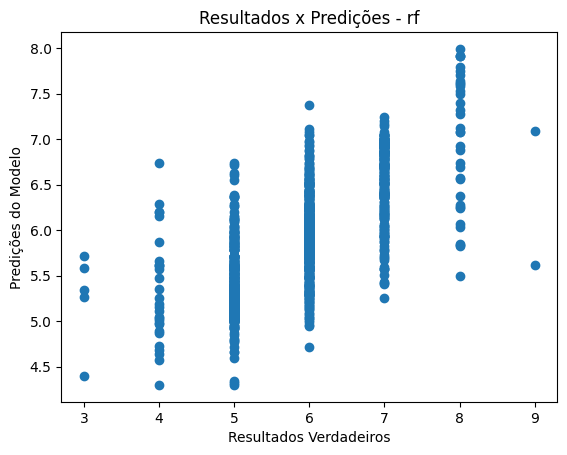




Modelo: xgbr
Erro Quadrático Médio -> xgbr: 0.394852444445745
Erro Absoluto Médio -> xgbr: 0.449563059057826



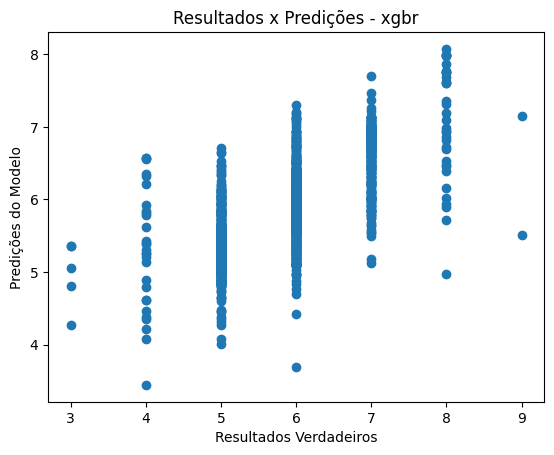




Modelo: svr
Erro Quadrático Médio -> svr: 0.6154766137563004
Erro Absoluto Médio -> svr: 0.6132859083268422



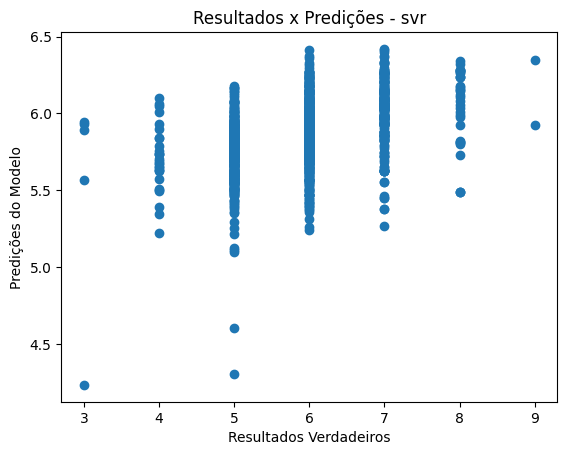

In [56]:
# instanciando os modelos

lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
xgbr = XGBRegressor()
svr = SVR()

models = {'lr': lr, 'knn': knn, 'rf': rf, 'xgbr': xgbr, 'svr': svr}

# treinando e aplicando todos os modelos
for model in models:
  m = models[model]
  m.fit(X_train, y_train)

  # aplicando o modelo nas variáveis de teste
  y_pred = m.predict(X_test)

  # Desempenho do modelo
  print(f"Modelo: {model}")
  print(f"Erro Quadrático Médio -> {model}: {mean_squared_error(y_pred, y_test)}")
  print(f"Erro Absoluto Médio -> {model}: {mean_absolute_error(y_pred, y_test)}\n")

  # Plot dos resultados x Predições do Modelo
  plt.scatter(y_test, y_pred)
  plt.xlabel("Resultados Verdadeiros")
  plt.ylabel("Predições do Modelo")
  plt.title(f"Resultados x Predições - {model}")
  plt.show()

  print("\n\n")